In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Dataset


In [ ]:
general_data = pd.read_csv('/content/drive/MyDrive/hr analytics/general_data.csv')
employee_survey_data = pd.read_csv('/content/drive/MyDrive/hr analytics/employee_survey_data.csv')
manager_survey_data = pd.read_csv('/content/drive/MyDrive/hr analytics/manager_survey_data.csv')

In [ ]:
print(general_data.shape , employee_survey_data.shape , manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 26) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


#Preprocessing

##Cleaning the Data

###BEFORE

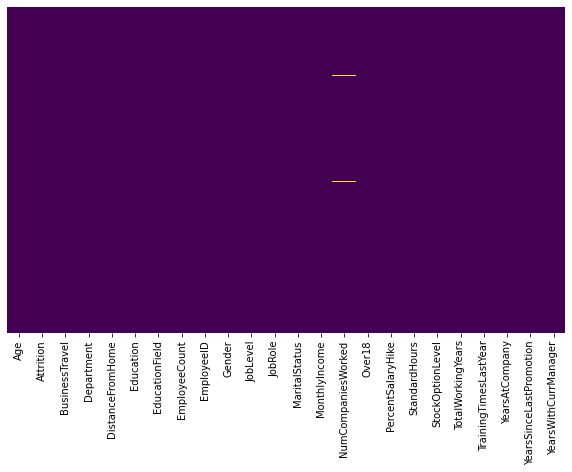

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(general_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

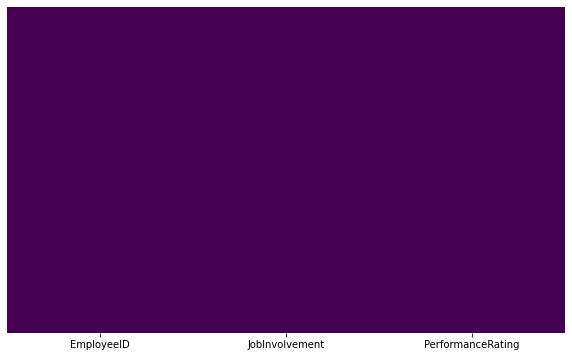

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(manager_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

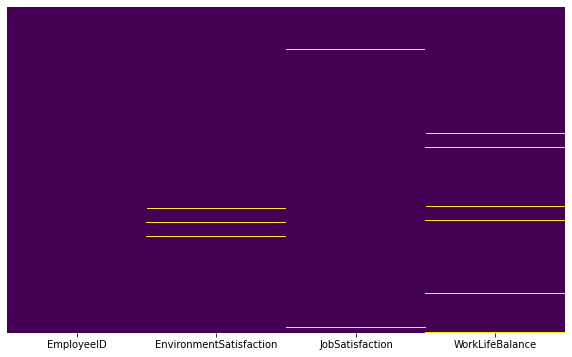

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(employee_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
general_data['NumCompaniesWorked'].fillna(value=general_data['NumCompaniesWorked'].mean(), inplace=True)
general_data['TotalWorkingYears'].fillna(value=general_data['TotalWorkingYears'].mean(), inplace=True)
employee_survey_data['EnvironmentSatisfaction'].fillna(value=employee_survey_data['EnvironmentSatisfaction'].mean(), inplace=True)
employee_survey_data['JobSatisfaction'].fillna(value=employee_survey_data['JobSatisfaction'].mean(), inplace=True)
employee_survey_data['WorkLifeBalance'].fillna(value=employee_survey_data['WorkLifeBalance'].mean(), inplace=True)

###AFTER

In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
print(general_data.shape ,  employee_survey_data.shape ,  manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


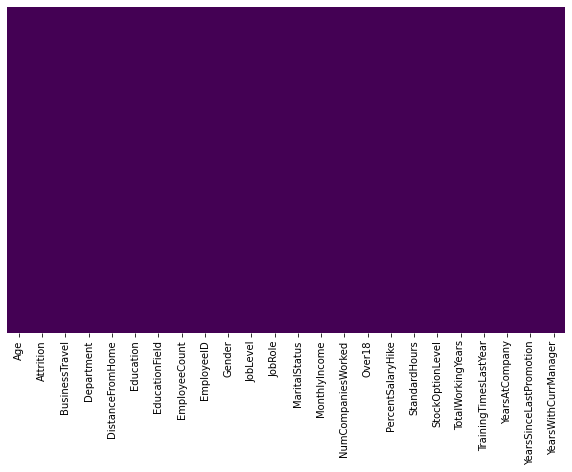

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(general_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

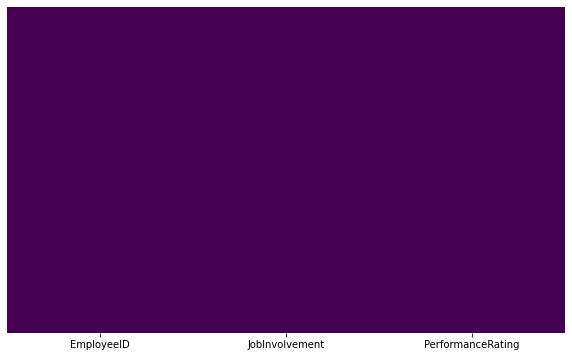

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(manager_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

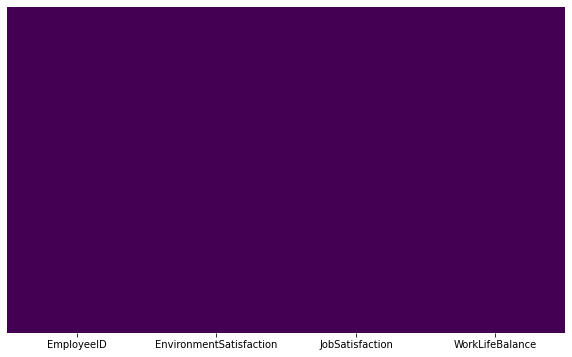

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(employee_survey_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Merging the Datasets

In [ ]:
merge = pd.merge(employee_survey_data, manager_survey_data, on='EmployeeID')
dataset = pd.merge(general_data, merge, on='EmployeeID')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

##Factorizing Categorical Variables

In [ ]:
general_data = pd.get_dummies(general_data,prefix=['Business'], columns = ['BusinessTravel'], drop_first=True)
general_data = pd.get_dummies(general_data,prefix=['Attrition'], columns = ['Attrition'], drop_first=True)
general_data = pd.get_dummies(general_data,prefix=['Department'], columns = ['Department'], drop_first=True)

In [ ]:
general_data.head()

,Age,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Frequently,Business_Travel_Rarely,Attrition_Yes,Department_Research & Development,Department_Sales
0,51,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,0,1,0,0,1
1,31,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,1,0,1,1,0
2,32,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,1,0,0,1,0
3,38,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,0,0,0,1,0
4,32,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,0,1,0,1,0


##Exploring the Data

UNIVARIATE DATA ANALYSIS

In [ ]:
print('Total Attrition Number is', dataset.Attrition.value_counts()[1])

Total Attrition Number is 711


**AGE AND GENDER**

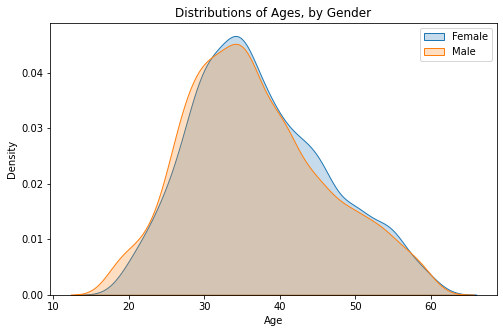

In [ ]:
female_age = dataset[dataset['Gender']=='Female']['Age']
male_age = dataset[dataset['Gender']=='Male']['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=female_age, label="Female", shade=True)
sns.kdeplot(data=male_age, label="Male", shade=True)

plt.title("Distributions of Ages, by Gender")
plt.legend()
plt.show()

Age Distribution is balanced.

**DISTANCE FROM HOME**

In [ ]:
dist_yes = df[df['Attrition']=='Yes']['DistanceFromHome']
dist_no = df[df['Attrition']=='No']['DistanceFromHome']

**EDUCATION**

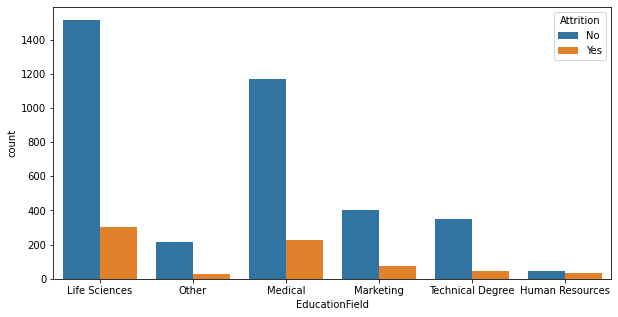

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'EducationField', data = dataset, hue='Attrition')

In [ ]:
edu = dataset['EducationField'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['EducationField'].value_counts()

edu_field_per = at_yes/edu*100

print(round(edu_field_per,2))

Human Resources     40.74
Life Sciences       16.67
Marketing           15.72
Medical             16.16
Other               12.20
Technical Degree    11.36
Name: EducationField, dtype: float64


Human resources has the highest ratio. 

**GENDER**

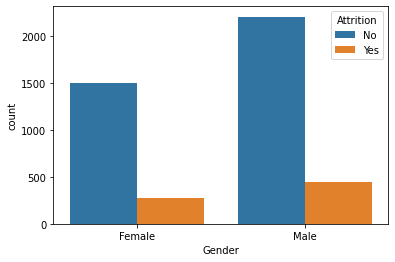

In [ ]:
sns.countplot(x = 'Gender', data = dataset, hue='Attrition')

In [ ]:
at_yes = dataset[dataset['Attrition']=='Yes']['Gender'].value_counts()

count_female = (dataset['Gender'] == 'Female').value_counts()[1]
fem_perc = (at_yes[1]/count_female)*100
count_male = (dataset['Gender'] == 'Male').value_counts()[1]
male_perc = (at_yes[0]/count_male)*100

print('Female Left Job Percentage:', round(fem_perc,3) , '%')
print('Male Left Job Percentage:', round(male_perc,3) , '%')

Female Left Job Percentage: 15.306 %
Male Left Job Percentage: 16.667 %


The ratio of males and females who left the job is approximately the same. We can see here, gender is not an indicator itself. Our initial hypothesis here is that it is not about genders.

**JOB LEVEL**

**JOB ROLE**

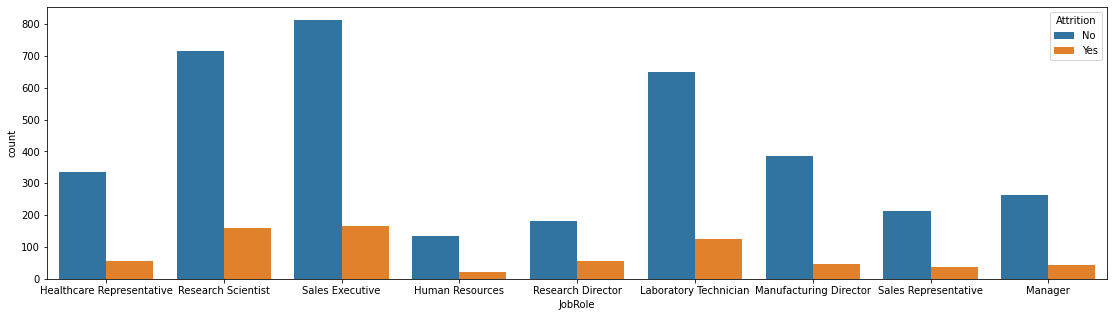

In [ ]:
plt.figure(figsize = (19,5))
sns.countplot(x = 'JobRole', data = dataset, hue='Attrition')
plt.show()

In [ ]:
edu = dataset['JobRole'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['JobRole'].value_counts()

job_role_per = at_yes/edu*100

print(round(job_role_per,2))

Healthcare Representative    14.50
Human Resources              13.46
Laboratory Technician        16.22
Manager                      13.73
Manufacturing Director       11.03
Research Director            23.75
Research Scientist           18.15
Sales Executive              16.87
Sales Representative         14.46
Name: JobRole, dtype: float64


The highest resign ratio here is that of a research director.

**MARITAL STATUS**

**MONTHLY INCOME**

**NUMBER OF COMPANIES WORKED**

**PERCENTAGE OF SALARY HIKE**

**TOTAL WORKING YEARS**

**TRAINING TIMES LAST YEAR**

**YEARS AT COMPANY**

**YEARS SINCE LAST PROMOTION**

**YEARS WITH CURRENT MANAGER**

**ENVIRONMENT SATISFACTION**

**JOB SATISFACTION**

**WORK LIFE BALANCE**

**JOB INVOLVEMENT**

**PERFORMANCE RATING**

#Training and Testing the Model

##Splitting the Dataset

##Applying Logistic Regression

##Confusion Matrix and Classification Report